In [1]:
from pandas import DataFrame

Data = {'x': [25,34,22,27,33,33,31,22,35,34,67,54,57,43,50,57,59,52,65,47,49,48,35,33,44,45,38,43,51,46],
        'y': [79,51,53,78,59,74,73,57,69,75,51,32,40,47,53,36,35,58,59,50,25,20,14,12,20,5,29,27,8,7]
       }
  
df = DataFrame(Data,columns=['x','y'])
print (df)

     x   y
0   25  79
1   34  51
2   22  53
3   27  78
4   33  59
5   33  74
6   31  73
7   22  57
8   35  69
9   34  75
10  67  51
11  54  32
12  57  40
13  43  47
14  50  53
15  57  36
16  59  35
17  52  58
18  65  59
19  47  50
20  49  25
21  48  20
22  35  14
23  33  12
24  44  20
25  45   5
26  38  29
27  43  27
28  51   8
29  46   7


# K-Means Clustering in Python – 3 clusters
Once you created the DataFrame based on the above data, you’ll need to import 2 additional Python modules:

matplotlib – for creating charts in Python
sklearn – for applying the K-Means Clustering in Python
In the code below, you can specify the number of clusters. For this example, assign 3 clusters as follows:

KMeans(n_clusters=3).fit(df)

[[29.6 66.8]
 [43.2 16.7]
 [55.1 46.1]]


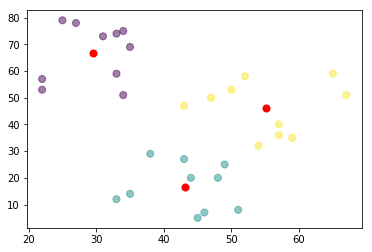

In [3]:
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

Data = {'x': [25,34,22,27,33,33,31,22,35,34,67,54,57,43,50,57,59,52,65,47,49,48,35,33,44,45,38,43,51,46],
        'y': [79,51,53,78,59,74,73,57,69,75,51,32,40,47,53,36,35,58,59,50,25,20,14,12,20,5,29,27,8,7]
       }
  
df = DataFrame(Data,columns=['x','y'])
  
kmeans = KMeans(n_clusters=3).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(df['x'], df['y'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)

Note that the center of each cluster (in red) represents the mean of all the observations that belong to that cluster.

As you might also see, the observations that belong to a given cluster are closer to the center of that cluster, in comparison to the centers of other clusters.

# K-Means Clustering in Python – 4 clusters
Let’s now see what would happen if we use 4 clusters instead. In that case, the only thing you’ll need to do is to change the n_clusters from 3 to 4:

KMeans(n_clusters=4).fit(df)

And so, your full Python code for 4 clusters would look like this:

[[43.2        16.7       ]
 [30.83333333 74.66666667]
 [55.1        46.1       ]
 [27.75       55.        ]]


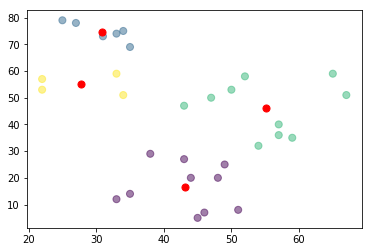

In [4]:
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

Data = {'x': [25,34,22,27,33,33,31,22,35,34,67,54,57,43,50,57,59,52,65,47,49,48,35,33,44,45,38,43,51,46],
        'y': [79,51,53,78,59,74,73,57,69,75,51,32,40,47,53,36,35,58,59,50,25,20,14,12,20,5,29,27,8,7]
       }
  
df = DataFrame(Data,columns=['x','y'])
  
kmeans = KMeans(n_clusters=4).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(df['x'], df['y'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)

# Tkinter GUI to Display the Results
You can use the tkinter module in Python to display the clusters on a simple graphical user interface.

This is the code that you can use (for 3 clusters):

In [5]:
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import tkinter as tk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

Data = {'x': [25,34,22,27,33,33,31,22,35,34,67,54,57,43,50,57,59,52,65,47,49,48,35,33,44,45,38,43,51,46],
        'y': [79,51,53,78,59,74,73,57,69,75,51,32,40,47,53,36,35,58,59,50,25,20,14,12,20,5,29,27,8,7]
       }
  
df = DataFrame(Data,columns=['x','y'])
  
kmeans = KMeans(n_clusters=3).fit(df)
centroids = kmeans.cluster_centers_

root= tk.Tk()

canvas1 = tk.Canvas(root, width = 100, height = 100)
canvas1.pack()

label1 = tk.Label(root, text=centroids, justify = 'center')
canvas1.create_window(70, 50, window=label1)

figure1 = plt.Figure(figsize=(5,4), dpi=100)
ax1 = figure1.add_subplot(111)
ax1.scatter(df['x'], df['y'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
ax1.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
scatter1 = FigureCanvasTkAgg(figure1, root) 
scatter1.get_tk_widget().pack(side=tk.LEFT, fill=tk.BOTH)

root.mainloop()

# More Advanced Tkinter GUI
In the final section of this tutorial, I’ll share the code to create a more advanced tkinter GUI that will allow you to:

Import an Excel file with two-dimensional data-set
Type the number of clusters needed
Display the clusters and centroids
Here is the full Python code:

In [13]:
import tkinter as tk
from tkinter import filedialog
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

root= tk.Tk()

canvas1 = tk.Canvas(root, width = 400, height = 300,  relief = 'raised')
canvas1.pack()

label1 = tk.Label(root, text='k-Means Clustering')
label1.config(font=('helvetica', 14))
canvas1.create_window(200, 25, window=label1)

label2 = tk.Label(root, text='Type Number of Clusters:')
label2.config(font=('helvetica', 8))
canvas1.create_window(200, 120, window=label2)

entry1 = tk.Entry (root) 
canvas1.create_window(200, 140, window=entry1)

def getExcel ():
    
    global df
    import_file_path = filedialog.askopenfilename()
    read_file = pd.read_excel (import_file_path)
    df = DataFrame(read_file,columns=['x','y'])  
    
browseButtonExcel = tk.Button(text=" Import Excel File ", command=getExcel, bg='green', fg='white', font=('helvetica', 10, 'bold'))
canvas1.create_window(200, 70, window=browseButtonExcel)

def getKMeans ():
    global df
    global numberOfClusters
    numberOfClusters = int(entry1.get())
    
    kmeans = KMeans(n_clusters=numberOfClusters).fit(df)
    centroids = kmeans.cluster_centers_
    
    label3 = tk.Label(root, text= centroids)
    canvas1.create_window(200, 250, window=label3)
    
    figure1 = plt.Figure(figsize=(4,3), dpi=100)
    ax1 = figure1.add_subplot(111)
    ax1.scatter(df['x'], df['y'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
    ax1.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
    scatter1 = FigureCanvasTkAgg(figure1, root) 
    scatter1.get_tk_widget().pack(side=tk.RIGHT, fill=tk.BOTH)
    
processButton = tk.Button(text=' Process k-Means ', command=getKMeans, bg='brown', fg='white', font=('helvetica', 10, 'bold'))
canvas1.create_window(200, 170, window=processButton)

root.mainloop()

Exception in Tkinter callback
Traceback (most recent call last):
  File "D:\anaconda\lib\tkinter\__init__.py", line 1702, in __call__
    return self.func(*args)
  File "<ipython-input-13-c5d847c3610d>", line 29, in getExcel
    read_file = pd.read_excel (import_file_path)
  File "D:\anaconda\lib\site-packages\pandas\util\_decorators.py", line 178, in wrapper
  File "D:\anaconda\lib\site-packages\pandas\util\_decorators.py", line 178, in wrapper
  File "D:\anaconda\lib\site-packages\pandas\io\excel.py", line 307, in read_excel
  File "D:\anaconda\lib\site-packages\pandas\io\excel.py", line 394, in __init__
  File "D:\anaconda\lib\site-packages\xlrd\__init__.py", line 162, in open_workbook
    ragged_rows=ragged_rows,
  File "D:\anaconda\lib\site-packages\xlrd\book.py", line 91, in open_workbook_xls
    biff_version = bk.getbof(XL_WORKBOOK_GLOBALS)
  File "D:\anaconda\lib\site-packages\xlrd\book.py", line 1271, in getbof
    bof_error('Expected BOF record; found %r' % self.mem[savpos:sa

Before you run the above code, you’ll need to store your two-dimensional data-set in an Excel file. For example, I stored the date-set that we saw at the beginning of this post in an Excel file: